- weight initializtion
- Activation Function
- Opimizer

In [58]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns


# dataset
from tensorflow.keras.datasets.mnist import load_data

In [4]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

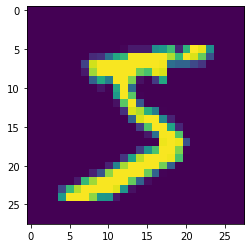

target :  5


In [7]:
plt.imshow(x_train[0])
plt.show()
print("target : ", y_train[0])

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 28*28)

In [10]:
x_train[0].shape

(784,)

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size = 0.7, random_state=100)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((18000, 784), (18000, 10), (10000, 784), (10000, 10))

In [19]:
def get_model() :
  model = Sequential()

  model.add(Dense(50,activation='sigmoid', input_shape=(784,)))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(10,activation='softmax'))
  return model

In [21]:
model = get_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

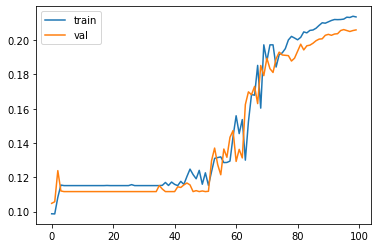

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'],loc="best")
plt.show()

In [25]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 0s 1ms/step - loss: 2.2378 - accuracy: 0.2074
[2.237840414047241, 0.20739999413490295]


### 성능향상

- ResNet: 가중치를 초기화하는 he_normal
- 0.2 -> 0.4 정확도 향상

In [26]:
def improve_model() :
  model = Sequential()

  model.add(Dense(50,activation='sigmoid', input_shape=(784,), kernel_initializer='he_normal'))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = improve_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")
model.summary()

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [1]:
# 가중치 변경만으로 정확도 향상 ( 0.2 -> 0.4 )

### Relu

In [32]:
def improve_relu_model() :
  model = Sequential()

  model.add(Dense(50,activation='relu', input_shape=(784,), kernel_initializer='he_normal'))
  model.add(Dense(50,activation='relu', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='relu', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='relu', kernel_initializer="he_normal"))
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = improve_relu_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")
model.summary()

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [1]:
result = model.evaluate(x_test,y_test)
print(result)

### optimizer 변경 - Adam, RMSprop

- Adam : 0.2 -> 0.8 정확도 향상

In [35]:
def improve_Adam_model() :
  model = Sequential()

  model.add(Dense(50,activation='sigmoid', input_shape=(784,), kernel_initializer='he_normal'))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(50,activation='sigmoid', kernel_initializer="he_normal"))
  model.add(Dense(10,activation='softmax'))

  optimizer = Adam(learning_rate=0.01)
  model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")
  return model

In [36]:
model = improve_Adam_model()

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [38]:
result = model.evaluate(x_test,y_test)
print(result)

313/313 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.8193
[0.5102745294570923, 0.8192999958992004]


## 배치 정규화

- 평균 0 ,분산 1 정규화를 통해서 학습이 잘  일어나도록 도와주는 방식
- 각 피쳐별 배치 정규화를 진행
- 정확도 0.99

In [42]:
def normalization_get_model() :
  model = Sequential()

  # activation 함수 앞 단에 배치되어야한다

  model.add(Dense(50,  input_shape=(784,)))
  model.add(BatchNormalization())
  model.add(Activation('sigmoid'))

  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('sigmoid'))

  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('sigmoid'))
  
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('sigmoid'))

  model.add(Dense(10, activation='softmax'))

  optimizer = Adam(learning_rate=0.01)
  model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")

  return model


In [43]:
model = normalization_get_model()


In [ ]:
# 배치사이즈 제거

history = model.fit(x_train, y_train,  validation_split=0.3, epochs=100, verbose=1)

In [46]:
result = model.evaluate(x_test,y_test)
print(result)

313/313 [==============================] - 0s 1ms/step - loss: 0.2405 - accuracy: 0.9556
[0.2405097633600235, 0.9556000232696533]


## dropout, early stopping

- dropout -> 과적합이 발생한 상황에서 써야 적합

In [50]:
def dropout_get_model() :
  model = Sequential()

  model.add(Dense(50,  input_shape=(784,)))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))
  
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation='softmax'))

  optimizer = Adam(learning_rate=0.01)
  model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics="accuracy")

  return model


In [51]:
model = dropout_get_model()

In [ ]:
history = model.fit(x_train, y_train,  validation_split=0.3, epochs=100, verbose=1)

In [46]:
result = model.evaluate(x_test,y_test)
print(result)

In [54]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(x_train, y_train,  validation_split=0.3, epochs=100, verbose=1, callbacks= callbacks)

Epoch 1/100
394/394 [==============================] - 1s 3ms/step - loss: 0.9567 - accuracy: 0.6769 - val_loss: 0.6896 - val_accuracy: 0.7683
Epoch 2/100
394/394 [==============================] - 1s 3ms/step - loss: 0.9613 - accuracy: 0.6759 - val_loss: 0.7454 - val_accuracy: 0.7635
Epoch 3/100
394/394 [==============================] - 1s 3ms/step - loss: 0.9664 - accuracy: 0.6690 - val_loss: 0.7342 - val_accuracy: 0.7659
Epoch 4/100
394/394 [==============================] - 1s 3ms/step - loss: 0.9582 - accuracy: 0.6787 - val_loss: 0.7307 - val_accuracy: 0.7541


### Ensemble

In [46]:
def get_model() :
  model = Sequential()

  model.add(Dense(50,activation='sigmoid', input_shape=(784,)))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(10,activation='softmax'))
  return model

In [60]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [61]:
model01 = KerasClassifier(build_fn=get_model, epochs = 100, verbose=0)
model02 = KerasClassifier(build_fn=get_model, epochs = 100, verbose=0)
model03 = KerasClassifier(build_fn=get_model, epochs = 100, verbose=0)

model01._estimator_type="classifier"
model02._estimator_type="classifier"
model03._estimator_type="classifier"

In [62]:
ensemble_model = VotingClassifier(estimators=[('model1', model01),('model2', model02),('model3', model03)],voting='soft')
ensemble_model.fit(x_train, y_train)
y_pred = ensemble_model.predict(x_test)

print('Test acc ->', accuracy_score(y_pred, y_test))

AttributeError: ignored